In [1]:
# -------------------------------------------------
# Chain with alternating site energies and hoppings
# -------------------------------------------------

from __future__ import print_function # python3 style print
from pythtb import *

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define function to set up model for a given paramter set
def set_model(t,del_t,Delta):
    # 1D model with two orbitals per cell
    lat=[[1.0]]
    orb=[[0.0],[0.5]]
    my_model=tbmodel(1,1,lat,orb)
    # alternating site energies (let average be zero)
    my_model.set_onsite([Delta,-Delta])
    # alternating hopping strengths
    my_model.add_hop(t+del_t, 0, 1, [0])
    my_model.add_hop(t-del_t, 1, 0, [1])
    return my_model

In [3]:
# set reference hopping strength to unity to set energy scale
t=-1.0

# set alternation strengths
del_t=-0.3   # bond strength alternation
Delta= 0.4   # site energy alternation

In [4]:
# set up the model
my_model=set_model(t,del_t,Delta)

In [5]:
# construct the k-path
(k_vec,k_dist,k_node)=my_model.k_path('full',121)
k_lab=(r'0',r'$\pi$',r'$2\pi$')

 Path in 1D BZ defined by nodes at [0.  0.5 1. ]



In [6]:
# solve for eigenvalues at each point on the path
evals=my_model.solve_all(k_vec)

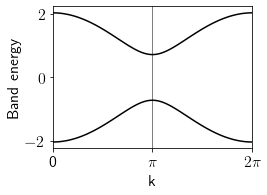

In [7]:
# set up the figure and specify details
fig, ax = plt.subplots(figsize=(4.,3.))
ax.set_xlim([0,k_node[-1]])
ax.set_xticks(k_node)
ax.set_xticklabels(k_lab)
ax.axvline(x=k_node[1],linewidth=0.5, color='k')
ax.set_xlabel("k")
ax.set_ylabel("Band energy")

# plot first and second bands
ax.plot(k_dist,evals[0],color='k')
ax.plot(k_dist,evals[1],color='k')

# save figure as a PDF
fig.tight_layout()
#fig.savefig("chain_alt.pdf")

plt.show()